<a href="https://colab.research.google.com/github/leksangpelkey/nypdopendata/blob/main/nypd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

**Loading dataframe**

In [6]:
url = "https://raw.githubusercontent.com/leksangpelkey/nypdopendata/main/NYPD_Arrest_Data__Year_to_Date_.csv"

In [7]:
df = pd.read_csv(url)

In [8]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [9]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,01/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [10]:
df.shape

(115299, 19)

Drop rows of Nan

In [11]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
5,234006839,09/24/2021,582.0,NaN,NaN,NaN,PL 2225501,F,M,23,0,25-44,M,BLACK,998659,228177,40.792966,-73.947964,POINT (-73.94796350499998 40.79296572700008)
152,232449002,08/19/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,M,5,0,45-64,M,WHITE,983859,199257,40.713599,-74.001412,POINT (-74.00141185699994 40.71359938900008)
313,233858226,09/21/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,103,0,45-64,M,BLACK,1041879,197084,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075)
370,234117127,09/26/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,113,0,25-44,F,WHITE HISPANIC,1046315,187088,40.679981,-73.776234,POINT (-73.77623390699993 40.67998073800004)
433,232559588,08/21/2021,NaN,NaN,NaN,NaN,PL 2410202,M,B,41,0,45-64,F,BLACK,1015683,237311,40.817992,-73.886439,POINT (-73.88643880199999 40.81799187000007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114578,222500619,01/01/2021,16.0,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,M,18,0,25-44,M,WHITE,989314,218756,40.767118,-73.981720,POINT (-73.98171996799994 40.767117864000056)
114612,222500620,01/01/2021,16.0,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,M,18,0,25-44,M,WHITE,989314,218756,40.767118,-73.981720,POINT (-73.98171996799994 40.767117864000056)
114819,222632191,01/05/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,Q,114,0,25-44,M,BLACK HISPANIC,1016292,226889,40.789384,-73.884288,POINT (-73.88428831799997 40.78938417500007)
114969,222663199,01/06/2021,49.0,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,B,49,0,25-44,M,BLACK,1028857,246461,40.843049,-73.838782,POINT (-73.83878239499995 40.843049260000036)


In [12]:
nan_df.shape

(1139, 19)

In [13]:
df= df.dropna(how ='any')

After dropping Nan value checking the data frame shape

In [14]:
df.shape

(114160, 19)

In [15]:
df.info

<bound method DataFrame.info of         ARREST_KEY  ...                       New Georeferenced Column
0        234233843  ...   POINT (-73.90973778899996 40.82618898100003)
1        234129823  ...   POINT (-73.93022154099998 40.67458330800008)
2        234040747  ...   POINT (-73.76598558899997 40.60344094100003)
3        234047720  ...   POINT (-73.91945797099999 40.83778161800007)
4        234042526  ...   POINT (-73.91627635999998 40.83598980000005)
...            ...  ...                                            ...
115294   222689440  ...   POINT (-73.83112953899997 40.69843969400005)
115295   222626401  ...   POINT (-73.84390995399998 40.85580274300003)
115296   222477062  ...  POINT (-73.90311219699998 40.870041281000056)
115297   222728174  ...   POINT (-73.91536344699995 40.76956124200007)
115298   222535613  ...   POINT (-73.94305278599995 40.64412879400004)

[114160 rows x 19 columns]>

In [16]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [17]:
df.isnull()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115295,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115296,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Column types

In [18]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

creating new data frame

In [19]:
new_df = df[['ARREST_KEY','ARREST_DATE','OFNS_DESC','LAW_CAT_CD','ARREST_BORO','ARREST_PRECINCT','AGE_GROUP','PERP_SEX','PERP_RACE',]]

Renaming the columns

In [20]:
new_df = new_df.rename(columns={'OFNS_DESC':'OFFENSES','LAW_CAT_CD':'LEVEL OF OFFENSE','ARREST_BORO':'BOROUGH','PERP_RACE':'RACE'})

In [21]:
new_df

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
0,234233843,09/29/2021,FELONY ASSAULT,F,B,42,25-44,M,BLACK
1,234129823,09/27/2021,RAPE,F,K,77,25-44,M,BLACK
2,234040747,09/25/2021,FELONY ASSAULT,F,Q,101,25-44,M,BLACK
3,234047720,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK
4,234042526,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,FELONY ASSAULT,F,Q,102,18-24,M,ASIAN / PACIFIC ISLANDER
115295,222626401,01/05/2021,FELONY ASSAULT,F,B,49,25-44,M,BLACK HISPANIC
115296,222477062,01/01/2021,VEHICLE AND TRAFFIC LAWS,M,B,50,25-44,M,WHITE HISPANIC
115297,222728174,01/07/2021,PETIT LARCENY,M,Q,114,25-44,M,WHITE HISPANIC


Augment data with additional columns 'Month'

In [22]:
new_df['Month']= new_df['ARREST_DATE'].str[0:2]
new_df['Month']=pd.to_numeric(new_df['Month'])
new_df.head()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE,Month
0,234233843,09/29/2021,FELONY ASSAULT,F,B,42,25-44,M,BLACK,9
1,234129823,09/27/2021,RAPE,F,K,77,25-44,M,BLACK,9
2,234040747,09/25/2021,FELONY ASSAULT,F,Q,101,25-44,M,BLACK,9
3,234047720,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK,9
4,234042526,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK,9


In [23]:
new_df.BOROUGH.unique()

array(['B', 'K', 'Q', 'M', 'S'], dtype=object)

Top 10 offenses 

In [24]:
pd.value_counts(new_df['OFFENSES'])[:10]

ASSAULT 3 & RELATED OFFENSES      19937
FELONY ASSAULT                    11472
PETIT LARCENY                      9132
DANGEROUS DRUGS                    8163
MISCELLANEOUS PENAL LAW            7629
CRIMINAL MISCHIEF & RELATED OF     7007
ROBBERY                            5706
DANGEROUS WEAPONS                  5460
GRAND LARCENY                      4760
VEHICLE AND TRAFFIC LAWS           3995
Name: OFFENSES, dtype: int64

Offenses committed Monthly

In [25]:
 new_df.groupby(['Month'])['ARREST_KEY'].count()

Month
1    13410
2    11528
3    13840
4    10296
5    11703
6    12721
7    13454
8    13599
9    13609
Name: ARREST_KEY, dtype: int64

Plotting the offenses committed monthly with the level of offenses
(F: Felony, M: Misdemeanor, V: Violation)

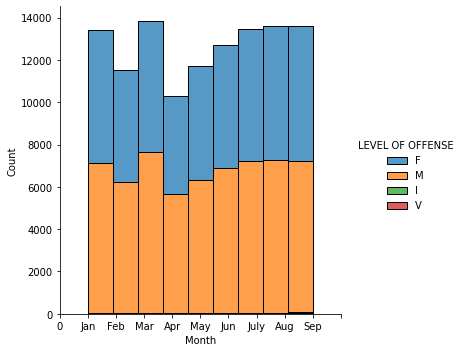

In [26]:
maindf = sns.displot(data= new_df, x='Month', hue = 'LEVEL OF OFFENSE', multiple ='stack',bins=9)
maindf.set_xticklabels(['0','Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep'])

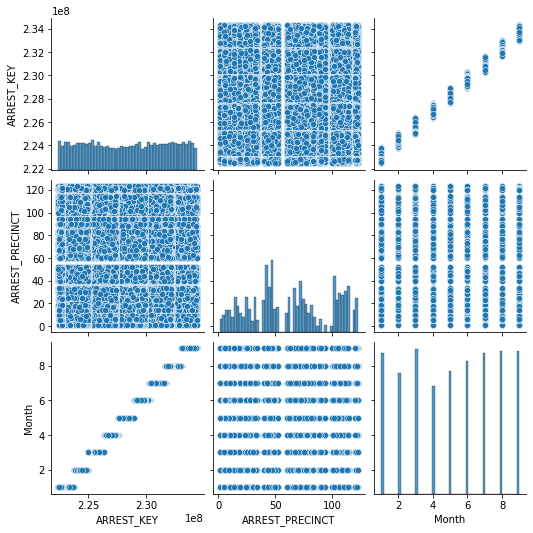

In [27]:
sns.pairplot(new_df)

Percentage of Male perpetrator

In [28]:
new_df.PERP_SEX.count()

114160

In [29]:
Male_perpetrator = new_df.loc[new_df.PERP_SEX=='M'].count()[0]
Female_perpetrator = new_df.loc[new_df.PERP_SEX=='F'].count()[0]

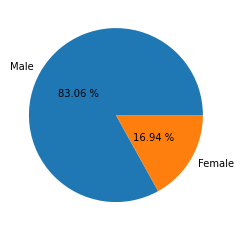

In [30]:
gender = [Male_perpetrator, Female_perpetrator]
labels = ['Male', 'Female']
plt.pie(gender, labels =labels, autopct='%.2f %%',pctdistance=0.5)
plt.show()  

In [31]:
Male_perpetrator_percentage = (94826/114160)*100
Male_perpetrator_percentage

83.06412053258583

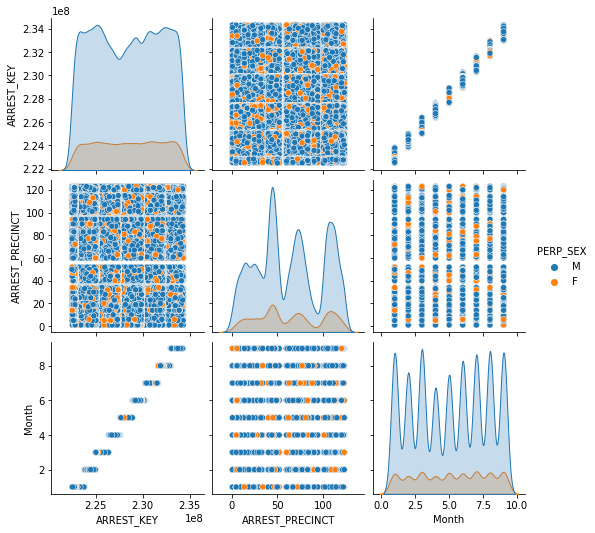

In [32]:
sns.pairplot(new_df, hue='PERP_SEX')

In [33]:
new_df.groupby(['BOROUGH']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE,Month
BOROUGH,,,,,,,,,
B,25057,25057,25057,25057,25057,25057,25057,25057,25057
K,30819,30819,30819,30819,30819,30819,30819,30819,30819
M,28447,28447,28447,28447,28447,28447,28447,28447,28447
Q,24467,24467,24467,24467,24467,24467,24467,24467,24467
S,5370,5370,5370,5370,5370,5370,5370,5370,5370


Comparing 5 Borough

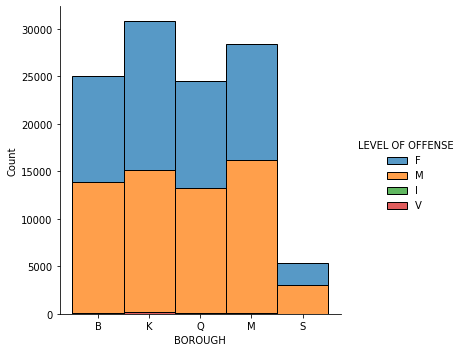

In [34]:
sns.displot(data=new_df, x="BOROUGH", hue="LEVEL OF OFFENSE", multiple="stack")

Plotting the offenses committed monthly in different borough

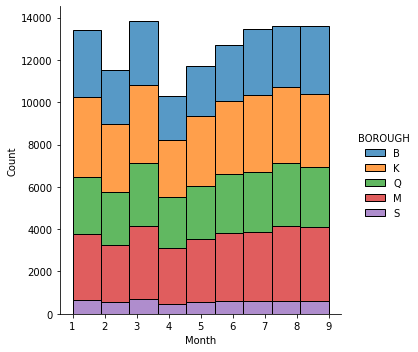

In [35]:
sns.displot(data= new_df, x='Month', hue = 'BOROUGH', multiple='stack', bins=9 )

**Queens**

In [36]:
Queens= new_df.loc[new_df['BOROUGH']=='Q']

In [37]:
Queens.shape

(24467, 10)

Offenses committed by different age group

In [38]:
Queens.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,PERP_SEX,RACE,Month
AGE_GROUP,,,,,,,,,
18-24,4736,4736,4736,4736,4736,4736,4736,4736,4736
25-44,14047,14047,14047,14047,14047,14047,14047,14047,14047
45-64,4710,4710,4710,4710,4710,4710,4710,4710,4710
65+,388,388,388,388,388,388,388,388,388
<18,586,586,586,586,586,586,586,586,586


Plotting in the pie chart percentage-wise offenses committed by different age group

In [39]:
Queens_agegroup1 =  Queens.loc[ Queens.AGE_GROUP=='<18'].count()[0]
Queens_agegroup2 =  Queens.loc[ Queens.AGE_GROUP=='18-24'].count()[0]
Queens_agegroup3 =  Queens.loc[ Queens.AGE_GROUP=='25-44'].count()[0]
Queens_agegroup4 =  Queens.loc[ Queens.AGE_GROUP=='45-64'].count()[0]
Queens_agegroup5 =  Queens.loc[ Queens.AGE_GROUP=='65+'].count()[0]

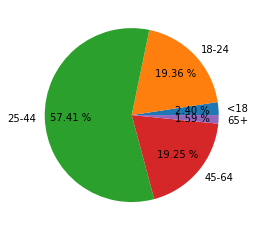

In [40]:
ages = [Queens_agegroup1,Queens_agegroup2, Queens_agegroup3, Queens_agegroup4, Queens_agegroup5]
labels = ['<18', '18-24', '25-44','45-64', '65+']    
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.7)

plt.show()      


Offenses committed Monthly



In [41]:
Queens.groupby(['Month']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
Month,,,,,,,,,
1,2700,2700,2700,2700,2700,2700,2700,2700,2700
2,2483,2483,2483,2483,2483,2483,2483,2483,2483
3,2976,2976,2976,2976,2976,2976,2976,2976,2976
4,2381,2381,2381,2381,2381,2381,2381,2381,2381
5,2521,2521,2521,2521,2521,2521,2521,2521,2521
6,2770,2770,2770,2770,2770,2770,2770,2770,2770
7,2843,2843,2843,2843,2843,2843,2843,2843,2843
8,2984,2984,2984,2984,2984,2984,2984,2984,2984
9,2809,2809,2809,2809,2809,2809,2809,2809,2809


Plotting the offenses committed  monthly in Queens with the level of offenses 

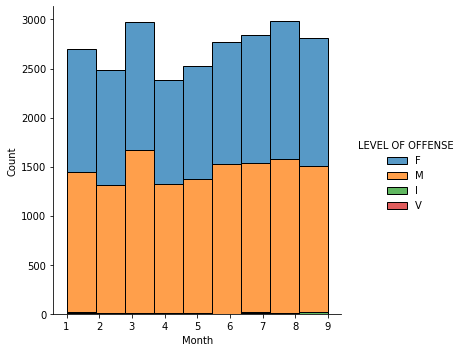

In [42]:
sns.displot(data=Queens, x="Month", hue="LEVEL OF OFFENSE", multiple="stack", bins=9)

In [43]:
Queens.groupby(['ARREST_PRECINCT']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,AGE_GROUP,PERP_SEX,RACE,Month
ARREST_PRECINCT,,,,,,,,,
100,606,606,606,606,606,606,606,606,606
101,1172,1172,1172,1172,1172,1172,1172,1172,1172
102,1644,1644,1644,1644,1644,1644,1644,1644,1644
103,2483,2483,2483,2483,2483,2483,2483,2483,2483
104,1471,1471,1471,1471,1471,1471,1471,1471,1471
105,1593,1593,1593,1593,1593,1593,1593,1593,1593
106,1406,1406,1406,1406,1406,1406,1406,1406,1406
107,1210,1210,1210,1210,1210,1210,1210,1210,1210
108,1127,1127,1127,1127,1127,1127,1127,1127,1127


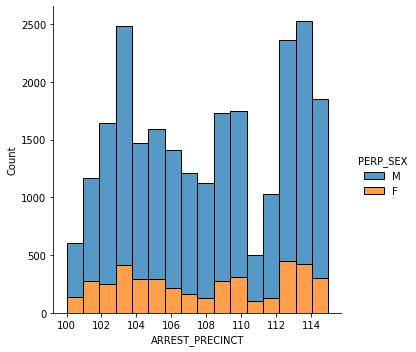

In [44]:
sns.displot(data=Queens, x="ARREST_PRECINCT", hue="PERP_SEX", multiple="stack", bins=16)

Top 5 offenses in Queens

In [45]:
Queens_top_offenses =  pd.value_counts(Queens['OFFENSES'])[:5]
Queens_top_offenses

ASSAULT 3 & RELATED OFFENSES      4629
FELONY ASSAULT                    2522
MISCELLANEOUS PENAL LAW           2286
PETIT LARCENY                     1633
CRIMINAL MISCHIEF & RELATED OF    1572
Name: OFFENSES, dtype: int64

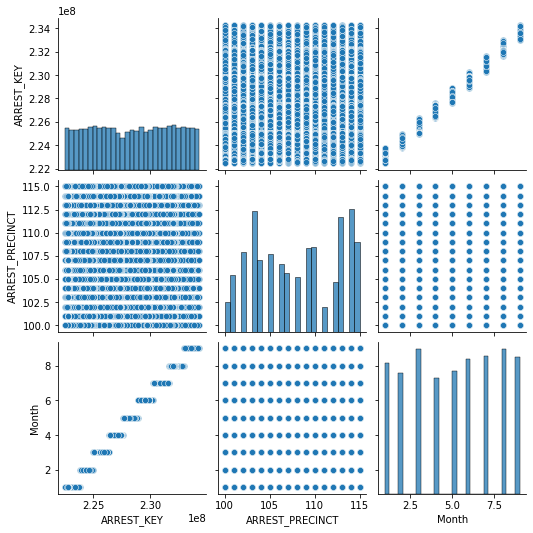

In [46]:
sns.pairplot(Queens)

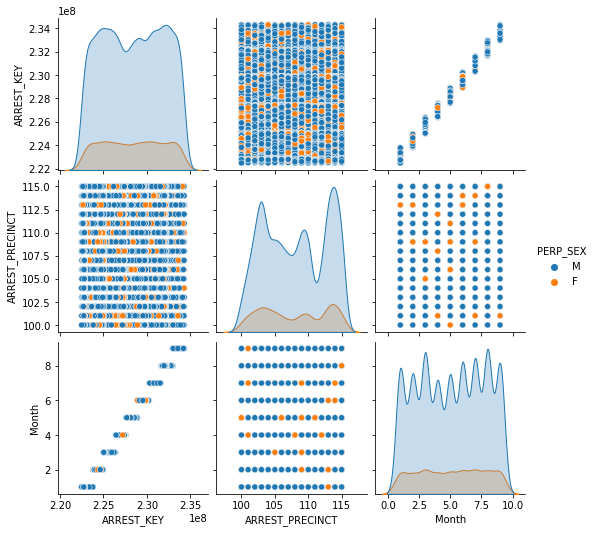

In [47]:
sns.pairplot(Queens, hue='PERP_SEX')

 **Manhattan**

In [48]:
Manhattan= new_df.loc[new_df['BOROUGH']=='M']

In [49]:
Manhattan.shape

(28447, 10)

Offenses committed by different age group

In [50]:
Manhattan.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,PERP_SEX,RACE,Month
AGE_GROUP,,,,,,,,,
18-24,4696,4696,4696,4696,4696,4696,4696,4696,4696
25-44,16111,16111,16111,16111,16111,16111,16111,16111,16111
45-64,6481,6481,6481,6481,6481,6481,6481,6481,6481
65+,478,478,478,478,478,478,478,478,478
<18,681,681,681,681,681,681,681,681,681


plotting in pie chart percentagewise offenses committed by different age group

In [51]:
Manhattan_agegroup1 =  Manhattan.loc[ Manhattan.AGE_GROUP=='<18'].count()[0]
Manhattan_agegroup2 =  Manhattan.loc[ Manhattan.AGE_GROUP=='18-24'].count()[0]
Manhattan_agegroup3 =  Manhattan.loc[ Manhattan.AGE_GROUP=='25-44'].count()[0]
Manhattan_agegroup4 =  Manhattan.loc[ Manhattan.AGE_GROUP=='45-64'].count()[0]
Manhattan_agegroup5 =  Manhattan.loc[ Manhattan.AGE_GROUP=='65+'].count()[0]

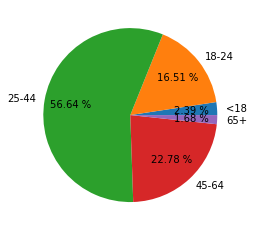

In [52]:
ages = [Manhattan_agegroup1, Manhattan_agegroup2, Manhattan_agegroup3, Manhattan_agegroup4, Manhattan_agegroup5]
labels = ['<18', '18-24', '25-44','45-64', '65+']    
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.7)

plt.show()      


Offenses committed Monthly

In [53]:
Manhattan.groupby(['Month']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
Month,,,,,,,,,
1,3140,3140,3140,3140,3140,3140,3140,3140,3140
2,2708,2708,2708,2708,2708,2708,2708,2708,2708
3,3456,3456,3456,3456,3456,3456,3456,3456,3456
4,2643,2643,2643,2643,2643,2643,2643,2643,2643
5,2973,2973,2973,2973,2973,2973,2973,2973,2973
6,3205,3205,3205,3205,3205,3205,3205,3205,3205
7,3254,3254,3254,3254,3254,3254,3254,3254,3254
8,3559,3559,3559,3559,3559,3559,3559,3559,3559
9,3509,3509,3509,3509,3509,3509,3509,3509,3509


Plotting the offenses committed monthly in Manhattan with level of offenses

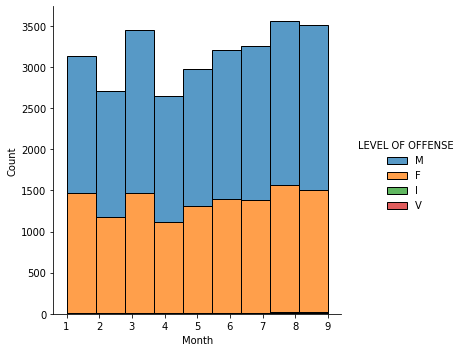

In [54]:
sns.displot(data=Manhattan, x="Month", hue="LEVEL OF OFFENSE", multiple="stack", bins=9)

Top 5 offenses in Manhattan

In [55]:
Manhattan_top_offenses =  pd.value_counts(Manhattan['OFFENSES'])[:5]
Manhattan_top_offenses

ASSAULT 3 & RELATED OFFENSES    4129
PETIT LARCENY                   3776
DANGEROUS DRUGS                 2616
FELONY ASSAULT                  2363
GRAND LARCENY                   1988
Name: OFFENSES, dtype: int64

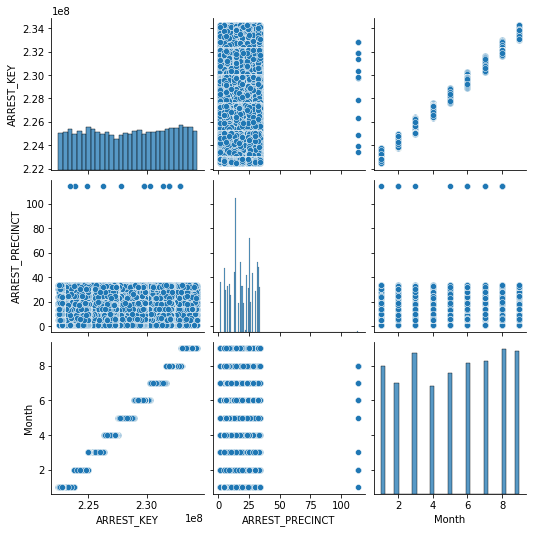

In [56]:
sns.pairplot(Manhattan)

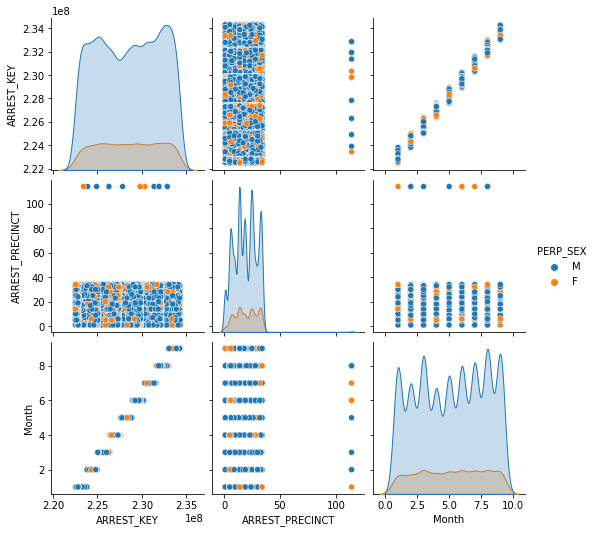

In [57]:
sns.pairplot(Manhattan, hue='PERP_SEX')

**Brooklyn**

In [58]:
Brooklyn = new_df.loc[new_df['BOROUGH']=='K'] 

In [59]:
Brooklyn.shape

(30819, 10)

Offenses committed by different age group

In [60]:
Brooklyn.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,PERP_SEX,RACE,Month
AGE_GROUP,,,,,,,,,
18-24,6183,6183,6183,6183,6183,6183,6183,6183,6183
25-44,17519,17519,17519,17519,17519,17519,17519,17519,17519
45-64,5612,5612,5612,5612,5612,5612,5612,5612,5612
65+,435,435,435,435,435,435,435,435,435
<18,1070,1070,1070,1070,1070,1070,1070,1070,1070


plotting in pie chart percentagewise offenses committed by different age group

In [61]:
Brooklyn_agegroup1 =  Brooklyn.loc[ Brooklyn.AGE_GROUP=='<18'].count()[0]
Brooklyn_agegroup2 =  Brooklyn.loc[ Brooklyn.AGE_GROUP=='18-24'].count()[0]
Brooklyn_agegroup3 =  Brooklyn.loc[ Brooklyn.AGE_GROUP=='25-44'].count()[0]
Brooklyn_agegroup4 =  Brooklyn.loc[ Brooklyn.AGE_GROUP=='45-64'].count()[0]
Brooklyn_agegroup5 =  Brooklyn.loc[ Brooklyn.AGE_GROUP=='65+'].count()[0]

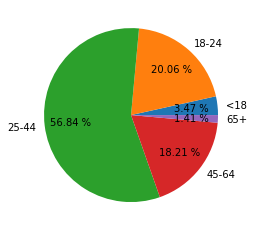

In [62]:
ages = [Brooklyn_agegroup1, Brooklyn_agegroup2, Brooklyn_agegroup3, Brooklyn_agegroup4, Brooklyn_agegroup5]
labels = ['<18', '18-24', '25-44','45-64', '65+']    
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.7)

plt.show() 

Offenses committed Monthly

In [63]:
Brooklyn.groupby(['Month']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
Month,,,,,,,,,
1,3771,3771,3771,3771,3771,3771,3771,3771,3771
2,3218,3218,3218,3218,3218,3218,3218,3218,3218
3,3696,3696,3696,3696,3696,3696,3696,3696,3696
4,2713,2713,2713,2713,2713,2713,2713,2713,2713
5,3295,3295,3295,3295,3295,3295,3295,3295,3295
6,3477,3477,3477,3477,3477,3477,3477,3477,3477
7,3606,3606,3606,3606,3606,3606,3606,3606,3606
8,3584,3584,3584,3584,3584,3584,3584,3584,3584
9,3459,3459,3459,3459,3459,3459,3459,3459,3459



Plotting the offenses committed monthly in Brooklyn with level of offenses

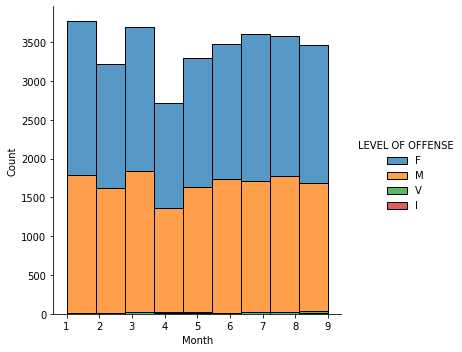

In [64]:
sns.displot(data=Brooklyn, x="Month", hue="LEVEL OF OFFENSE", multiple="stack", bins=9)

Top 5 offenses in Brooklyn

In [65]:
Brooklyn_top_offenses =  pd.value_counts(Brooklyn['OFFENSES'])[:5]

In [66]:
Brooklyn_top_offenses

ASSAULT 3 & RELATED OFFENSES    5006
FELONY ASSAULT                  3352
MISCELLANEOUS PENAL LAW         2552
PETIT LARCENY                   2060
DANGEROUS WEAPONS               2008
Name: OFFENSES, dtype: int64

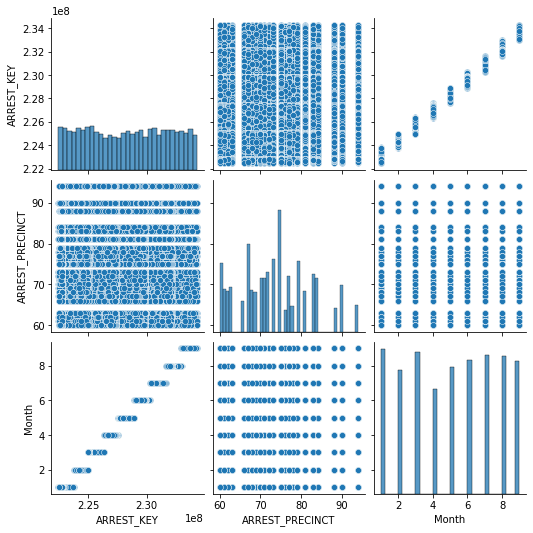

In [67]:
sns.pairplot(Brooklyn)

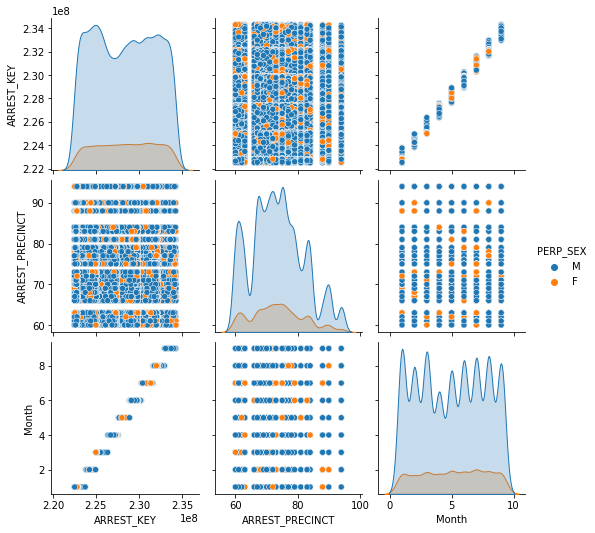

In [68]:
sns.pairplot(Brooklyn, hue='PERP_SEX')

**Bronx**

In [69]:
Bronx = new_df.loc[new_df['BOROUGH']=='B'] 

In [70]:
Bronx.shape

(25057, 10)

Offenses committed by different age group

In [71]:
Bronx.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,PERP_SEX,RACE,Month
AGE_GROUP,,,,,,,,,
18-24,5108,5108,5108,5108,5108,5108,5108,5108,5108
25-44,14330,14330,14330,14330,14330,14330,14330,14330,14330
45-64,4400,4400,4400,4400,4400,4400,4400,4400,4400
65+,288,288,288,288,288,288,288,288,288
<18,931,931,931,931,931,931,931,931,931


plotting in pie chart percentagewise offenses committed by different age group

In [72]:
Bronx_agegroup1 =  Bronx.loc[ Bronx.AGE_GROUP=='<18'].count()[0]
Bronx_agegroup2 =  Bronx.loc[ Bronx.AGE_GROUP=='18-24'].count()[0]
Bronx_agegroup3 =  Bronx.loc[ Bronx.AGE_GROUP=='25-44'].count()[0]
Bronx_agegroup4 =  Bronx.loc[ Bronx.AGE_GROUP=='45-64'].count()[0]
Bronx_agegroup5 =  Bronx.loc[ Bronx.AGE_GROUP=='65+'].count()[0]

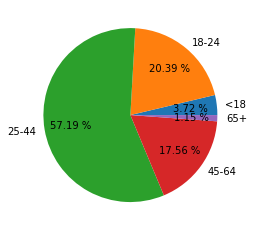

In [73]:
ages = [Bronx_agegroup1, Bronx_agegroup2, Bronx_agegroup3, Bronx_agegroup4, Bronx_agegroup5]
labels = ['<18', '18-24', '25-44','45-64', '65+']    
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.7)

plt.show() 

Offenses committed Monthly

In [74]:
Bronx.groupby(['Month']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
Month,,,,,,,,,
1,3163,3163,3163,3163,3163,3163,3163,3163,3163
2,2571,2571,2571,2571,2571,2571,2571,2571,2571
3,3024,3024,3024,3024,3024,3024,3024,3024,3024
4,2075,2075,2075,2075,2075,2075,2075,2075,2075
5,2370,2370,2370,2370,2370,2370,2370,2370,2370
6,2644,2644,2644,2644,2644,2644,2644,2644,2644
7,3129,3129,3129,3129,3129,3129,3129,3129,3129
8,2866,2866,2866,2866,2866,2866,2866,2866,2866
9,3215,3215,3215,3215,3215,3215,3215,3215,3215


Plotting the offenses committed monthly in Bronx with level of offenses

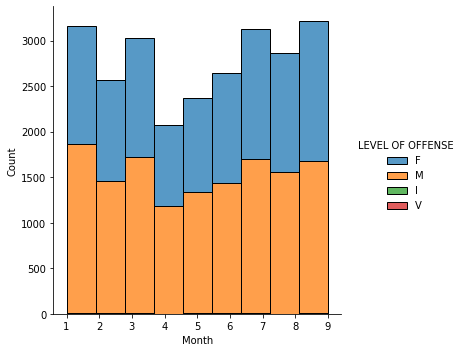

In [75]:
sns.displot(data=Bronx, x="Month", hue="LEVEL OF OFFENSE", multiple="stack", bins=9)

Top 5 offenses in Bronx

In [76]:
Bronx_top_offenses =  pd.value_counts(Bronx['OFFENSES'])[:5]

In [77]:
Bronx_top_offenses

ASSAULT 3 & RELATED OFFENSES      5404
FELONY ASSAULT                    2852
DANGEROUS DRUGS                   1990
CRIMINAL MISCHIEF & RELATED OF    1502
ROBBERY                           1477
Name: OFFENSES, dtype: int64

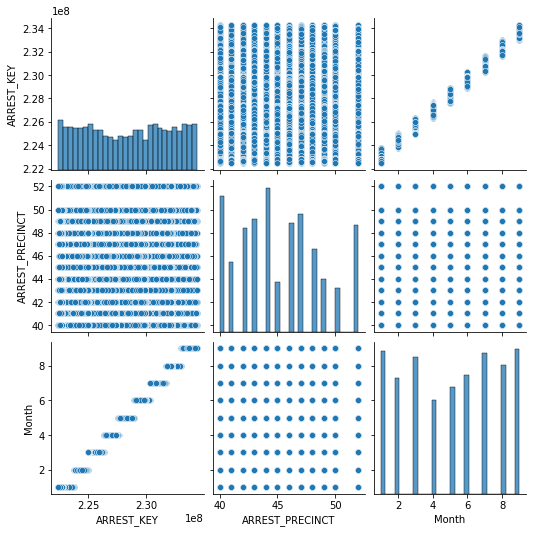

In [78]:
sns.pairplot(Bronx)

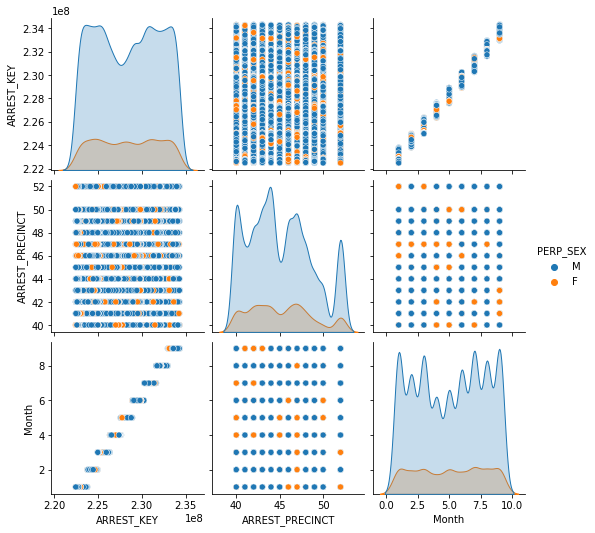

In [79]:
sns.pairplot(Bronx, hue='PERP_SEX')

**Staten Island**

In [80]:
Staten_island = new_df.loc[new_df['BOROUGH']=='S'] 

In [81]:
Staten_island.shape

(5370, 10)

Offenses committed by different age group

In [82]:
Staten_island.groupby(['AGE_GROUP']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,PERP_SEX,RACE,Month
AGE_GROUP,,,,,,,,,
18-24,1051,1051,1051,1051,1051,1051,1051,1051,1051
25-44,3102,3102,3102,3102,3102,3102,3102,3102,3102
45-64,1011,1011,1011,1011,1011,1011,1011,1011,1011
65+,66,66,66,66,66,66,66,66,66
<18,140,140,140,140,140,140,140,140,140


plotting in pie chart percentagewise offenses committed by different age group

In [83]:
Staten_island_agegroup1 =  Staten_island.loc[ Staten_island.AGE_GROUP=='<18'].count()[0]
Staten_island_agegroup2 =  Staten_island.loc[ Staten_island.AGE_GROUP=='18-24'].count()[0]
Staten_island_agegroup3 =  Staten_island.loc[ Staten_island.AGE_GROUP=='25-44'].count()[0]
Staten_island_agegroup4 =  Staten_island.loc[ Staten_island.AGE_GROUP=='45-64'].count()[0]
Staten_island_agegroup5 =  Staten_island.loc[ Staten_island.AGE_GROUP=='65+'].count()[0]

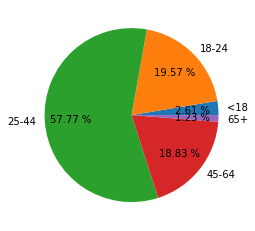

In [84]:
ages = [Staten_island_agegroup1, Staten_island_agegroup2, Staten_island_agegroup3, Staten_island_agegroup4, Staten_island_agegroup5]
labels = ['<18', '18-24', '25-44','45-64', '65+']    
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.7)

plt.show() 

Offenses committed Monthly

In [85]:
Staten_island.groupby(['Month']).count()

,ARREST_KEY,ARREST_DATE,OFFENSES,LEVEL OF OFFENSE,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,RACE
Month,,,,,,,,,
1,636,636,636,636,636,636,636,636,636
2,548,548,548,548,548,548,548,548,548
3,688,688,688,688,688,688,688,688,688
4,484,484,484,484,484,484,484,484,484
5,544,544,544,544,544,544,544,544,544
6,625,625,625,625,625,625,625,625,625
7,622,622,622,622,622,622,622,622,622
8,606,606,606,606,606,606,606,606,606
9,617,617,617,617,617,617,617,617,617


Plotting the offenses committed monthly in Staten_island with level of offenses

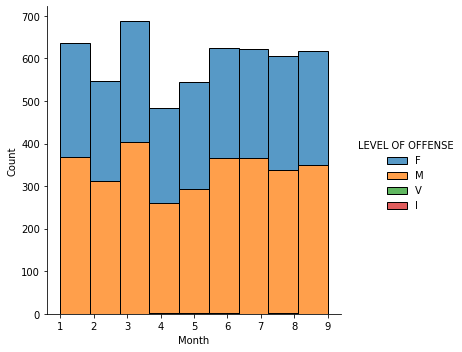

In [86]:
sns.displot(data=Staten_island, x="Month", hue="LEVEL OF OFFENSE", multiple="stack", bins=9)

Top 5 offenses in Staten Island

In [87]:
Staten_island_top_offenses = pd.value_counts(Staten_island['OFFENSES'])[:5]

In [88]:
Staten_island_top_offenses

ASSAULT 3 & RELATED OFFENSES    769
MISCELLANEOUS PENAL LAW         599
DANGEROUS DRUGS                 517
VEHICLE AND TRAFFIC LAWS        440
FELONY ASSAULT                  383
Name: OFFENSES, dtype: int64

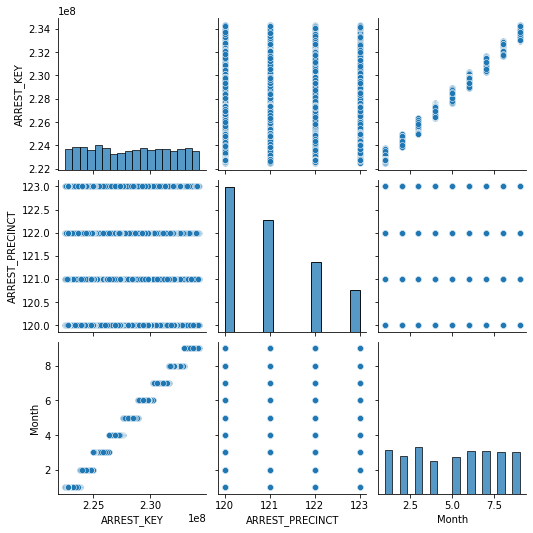

In [89]:
sns.pairplot(Staten_island)

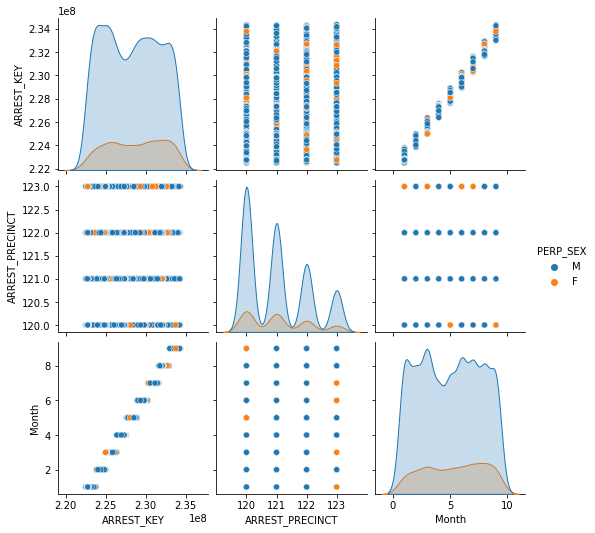

In [90]:
sns.pairplot(Staten_island, hue='PERP_SEX')

**Conclusion**:
From this  data i can come to conclusion that maximum number of perpetrator are from the age group of 25-44 ranging between 56 to 58 percentage of offenses. Percentage of offenses committed by Male are higher in all borough and top 5 offenses over all are:

ASSAULT 3 & RELATED OFFENSES      19937

FELONY ASSAULT                    11472

PETIT LARCENY                      9132

DANGEROUS DRUGS                    8163

MISCELLANEOUS PENAL LAW            7629

